In [94]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 1.数据读取

In [95]:
train_data = pd.read_csv("D:\\GIT\\ml_dl\\ml\\classify\\bearing\\train.csv")

In [96]:
test_data = pd.read_csv("D:\\GIT\\ml_dl\\ml\\classify\\bearing\\test_data.csv")

In [97]:
train_data.head(5)

,id,1,2,3,4,5,6,7,8,9,...,5992,5993,5994,5995,5996,5997,5998,5999,6000,label
0,1,0.563650,1.069229,-0.837759,-1.122021,0.433296,0.770755,-0.477153,-0.588421,0.455224,...,-0.050761,0.220506,0.036548,-0.097461,-0.084060,-0.007716,-0.049949,-0.018274,0.021523,7
1,2,0.061333,0.058830,0.056952,0.068634,0.073433,0.072390,0.042975,-0.007302,-0.026286,...,0.061333,0.107437,0.104516,0.063419,-0.014394,-0.048607,-0.009388,0.058830,0.129342,0
2,3,0.035736,0.010964,-0.164872,-0.167714,-0.125075,-0.104771,-0.016650,0.151471,0.137258,...,4.272044,-1.991455,-2.922208,1.937039,0.704156,-2.085667,0.203044,0.739892,-2.149829,9
3,4,-0.046700,0.060913,0.009340,-0.093400,-0.067817,0.022335,0.006091,-0.076751,-0.032893,...,0.095025,-0.000406,0.091776,0.074314,-0.082842,-0.110050,-0.028020,0.025990,-0.050355,9
4,5,0.162922,-0.377662,0.014457,0.565437,-0.203369,-0.511508,0.410961,0.228546,-0.515244,...,-0.093563,-0.263632,0.114517,0.209541,-0.184851,-0.075370,0.286211,0.005685,-0.223348,7


# 2.目标值分布观察

数据量较少。但是分布还算均匀。

In [98]:
y_label_count = train_data.groupby(['label'])['label'].count()
y_label_count

label
0    177
1     46
2     43
3     50
4     51
5     47
6     52
7    140
8     45
9    141
Name: label, dtype: int64

注意：同一列的数据不一定是同一个时间点的采样数据，即不要把每一列当作一个特征
先看眼数据，啥也看不出来。数据比较完整，没有缺失，不用也不能进行填充等操作

In [99]:
X_train = train_data.iloc[:,1:6001]
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000
0,0.563650,1.069229,-0.837759,-1.122021,0.433296,0.770755,-0.477153,-0.588421,0.455224,0.555122,...,-0.150659,-0.050761,0.220506,0.036548,-0.097461,-0.084060,-0.007716,-0.049949,-0.018274,0.021523
1,0.061333,0.058830,0.056952,0.068634,0.073433,0.072390,0.042975,-0.007302,-0.026286,-0.006050,...,0.033796,0.061333,0.107437,0.104516,0.063419,-0.014394,-0.048607,-0.009388,0.058830,0.129342
2,0.035736,0.010964,-0.164872,-0.167714,-0.125075,-0.104771,-0.016650,0.151471,0.137258,0.045076,...,1.151665,4.272044,-1.991455,-2.922208,1.937039,0.704156,-2.085667,0.203044,0.739892,-2.149829
3,-0.046700,0.060913,0.009340,-0.093400,-0.067817,0.022335,0.006091,-0.076751,-0.032893,0.023553,...,0.137258,0.095025,-0.000406,0.091776,0.074314,-0.082842,-0.110050,-0.028020,0.025990,-0.050355
4,0.162922,-0.377662,0.014457,0.565437,-0.203369,-0.511508,0.410961,0.228546,-0.515244,0.013157,...,0.216039,-0.093563,-0.263632,0.114517,0.209541,-0.184851,-0.075370,0.286211,0.005685,-0.223348


# 3.特征提取 提取和，均值，方差等

In [102]:
X_train_trans = pd.DataFrame()
X_train_trans['sum'] = np.sum(X_train,axis =1)
X_train_trans['abs_sum'] = np.sum(np.abs(X_train),axis =1)
X_train_trans['per5'] = np.percentile(X_train,q=5,axis =1) 
X_train_trans['per95'] = np.percentile(X_train,q=95,axis =1) 
X_train_trans['per99'] = np.percentile(X_train,q=99,axis =1) 

X_train_trans['mean'] = np.mean(X_train,axis =1)
X_train_trans['min'] = np.min(X_train,axis =1)
X_train_trans['max'] = np.max(X_train,axis =1)
X_train_trans['std'] = np.std(X_train,axis =1)
X_train_trans['var'] = np.var(X_train,axis =1)
X_train_trans['median'] = np.median(X_train,axis =1)
X_train_trans['skew'] = stats.skew(X_train,axis =1)
X_train_trans['kurtosis'] = stats.kurtosis(X_train,axis =1)  
X_train_trans['label'] =train_data['label']

y = pd.DataFrame()
y['label'] =train_data['label']
X_train_trans.head()

,sum,abs_sum,per5,per95,per99,mean,min,max,std,var,median,skew,kurtosis,label
0,28.589395,2154.024642,-1.004296,0.971362,1.892394,0.004765,-3.003019,3.236114,0.583343,0.340289,0.007919,0.000519,4.984610,7
1,91.983113,325.233054,-0.098466,0.119537,0.160219,0.015331,-0.222801,0.221132,0.065739,0.004322,0.017524,-0.205528,0.036342,0
2,19.617697,1605.012177,-0.637192,0.628238,1.901311,0.003270,-5.501272,5.912233,0.540327,0.291954,0.002843,0.231480,21.957896,9
3,24.154104,955.968911,-0.277378,0.313520,1.300825,0.004026,-3.955295,3.712455,0.366301,0.134176,0.003249,-0.492159,34.973034,9
4,79.547894,976.343474,-0.332667,0.357910,0.703714,0.013258,-1.754299,1.550606,0.233977,0.054745,0.010802,-0.048808,5.036917,7


从转换后的特征来看，不同label的数据还是比较有区分度的。

In [103]:
test_trans = pd.DataFrame()
test_trans['id'] = test_data['id']
test_trans['sum'] = np.sum(test_data.iloc[:,1:6001],axis =1)
test_trans['abs_sum'] = np.sum(np.abs(test_data.iloc[:,1:6001]),axis =1)
test_trans['per5'] = np.percentile(test_data.iloc[:,1:6001],q=5,axis =1) 
test_trans['per95'] = np.percentile(test_data.iloc[:,1:6001],q=95,axis =1) 
test_trans['per99'] = np.percentile(test_data.iloc[:,1:6001],q=99,axis =1) 
test_trans['mean'] = np.mean(test_data.iloc[:,1:6001],axis =1)
test_trans['min'] = np.min(test_data.iloc[:,1:6001],axis =1)
test_trans['max'] = np.max(test_data.iloc[:,1:6001],axis =1)
test_trans['std'] = np.std(test_data.iloc[:,1:6001],axis =1)
test_trans['var'] = np.var(test_data.iloc[:,1:6001],axis =1)
test_trans['median'] = np.median(test_data.iloc[:,1:6001],axis =1)
test_trans['skew'] = stats.skew(test_data.iloc[:,1:6001],axis =1)
test_trans['kurtosis'] = stats.kurtosis(test_data.iloc[:,1:6001],axis =1) 
test_trans.head()

,id,sum,abs_sum,per5,per95,per99,mean,min,max,std,var,median,skew,kurtosis
0,1,20.936670,1593.757047,-0.583690,0.584421,2.087291,0.003489,-4.631026,5.202391,0.537096,0.288472,0.003249,-0.019100,17.459809
1,2,36.363946,3711.522106,-1.285755,1.312496,2.201414,0.006061,-2.891751,3.168703,0.809820,0.655808,-0.003452,0.085543,1.154068
2,3,39.485544,984.972515,-0.299287,0.312749,1.293028,0.006581,-3.624334,3.813977,0.361151,0.130430,0.006497,-0.474609,30.183324
3,4,57.501702,311.344067,-0.097423,0.109940,0.148328,0.009584,-0.243246,0.197559,0.063453,0.004026,0.011891,-0.156539,-0.127848
4,5,26.891785,733.222105,-0.241866,0.261204,0.358509,0.004482,-0.518818,0.556503,0.152550,0.023271,0.003411,0.046709,-0.115646


# 4.分类分布查看

画一个分类散点图，看看分布情况。pca降到2维画平面图

In [107]:
from sklearn.decomposition import PCA
var=["sum","abs_sum","per5","per95","per99","mean","min","max","std","var","median","skew","kurtosis"]
pca = PCA(n_components=2)
pca.fit(X_train_trans[var])
X_pca=pca.transform(X_train_trans[var])
print(pca.explained_variance_ratio_)  
X_pca_df =pd.DataFrame(X_pca) 
pic_x=pd.concat([X_pca_df,y],axis=1) 

[0.99591646 0.00398554]


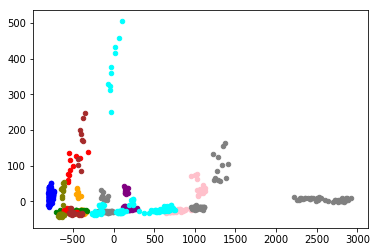

In [108]:
import matplotlib.pyplot as plt
colors=['blue','orange','green','red','purple','brown','pink','gray','olive','cyan'] 
for i in range(0,10):
    Xi=pic_x[pic_x['label']==i][0]
    yi=pic_x[pic_x['label']==i][1]
    plt.scatter(Xi, yi, s=20, c=colors[i], label=i)

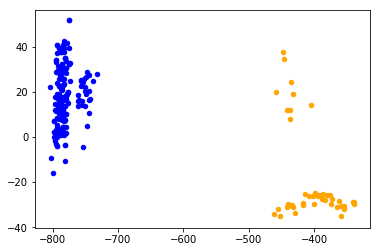

In [109]:
state_list=[0,1]
for i in state_list:
    Xi=pic_x[pic_x['label']==i][0]
    yi=pic_x[pic_x['label']==i][1]
    plt.scatter(Xi, yi, s=20, c=colors[i], label=i)

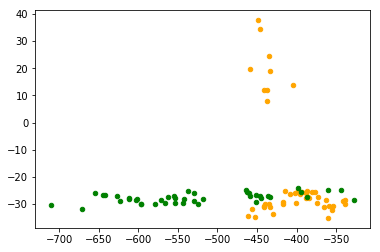

In [110]:
state_list=[1,2]
for i in state_list:
    Xi=pic_x[pic_x['label']==i][0]
    yi=pic_x[pic_x['label']==i][1]
    plt.scatter(Xi, yi, s=20, c=colors[i], label=i)

从上面的图可以看出来，正常状态和异常状态区分度很好。但1-9异常状态间区分度不太好。说明选取的特征还不够，有时间继续探索补充特征吧。

# 5.分类算法，直接用随机森林

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
clf = RandomForestClassifier(n_estimators=50)
var=["sum","abs_sum","per5","per95","per99","mean","min","max","std","var","median","skew","kurtosis"]
x_train, x_val, y_train, y_val = train_test_split(X_train_trans[var], y , test_size=0.2)
clf.fit(x_train, y_train)
print(confusion_matrix(y_val, clf.predict(x_val)))
print(accuracy_score(y_val, clf.predict(x_val)))

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  1]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 28]]
0.9937106918238994


In [112]:
from sklearn.ensemble import GradientBoostingClassifier 
gb_clf = GradientBoostingClassifier(n_estimators=50) 
gb_clf.fit(x_train, y_train)
print(confusion_matrix(y_val, gb_clf.predict(x_val)))
print(accuracy_score(y_val, gb_clf.predict(x_val)))

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  1  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 0  0  1  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 28]]
0.9874213836477987


分别用了随机森林和梯度boosting，效果都不错，但是因为样本量很少，准确率在95%-99%之间吧。长传dcrace上结果97%

In [113]:
clf.fit(X_train_trans[var], y )
y_test=clf.predict(test_trans[var]) 
test_trans['label']=y_test
test_trans.to_csv("D:\\GIT\\ml_dl\\ml\\classify\\bearing\\sample.csv",index=0,header=1,columns=['id','label'])